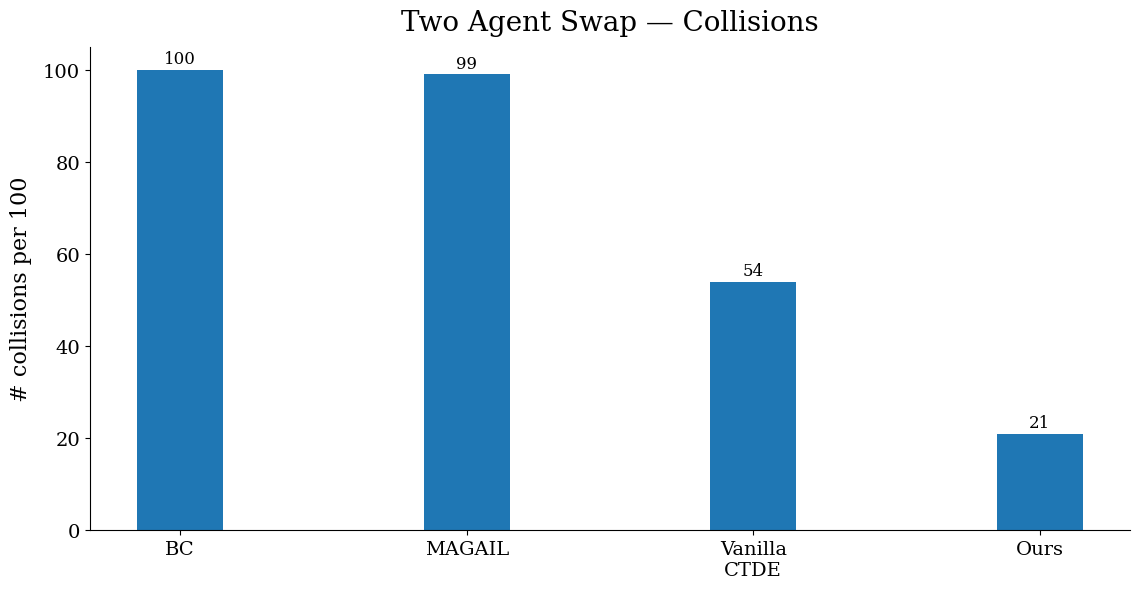

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MultipleLocator

# Palatino (with fallbacks)
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Palatino", "Palatino Linotype", "Book Antiqua",
                   "URW Palladio L", "TeX Gyre Pagella", "DejaVu Serif"],
    "axes.unicode_minus": False,
})

methods = ["BC", "MAGAIL", "Vanilla\nCTDE", "Ours"]

data = {
    "Total Collisions": [100, 99, 54, 21],
    # Add more metrics here if needed, e.g.:
    # "Agent Collisions (2.7)": [...],
    # "Obstacle Collisions (3.6)": [...],
}

df = pd.DataFrame(data, index=methods)

x = list(range(len(methods)))
n_series = df.shape[1]
bar_width = min(0.8 / n_series, 0.3)

fig, ax = plt.subplots(figsize=(11.5, 6))

containers = []
for j, col in enumerate(df.columns):
    offset = (j - (n_series - 1) / 2) * (bar_width + 0.02)
    bars = ax.bar([xi + offset for xi in x], df.iloc[:, j].values,
                  width=bar_width, label=col)
    containers.append(bars)

# Title and labels (larger font sizes)
ax.set_title("Two Agent Swap — Collisions", pad=12, fontsize=20)
ax.set_ylabel("# collisions per 100", labelpad=8, fontsize=16)

ax.set_ylim(0, 105)
ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=0, ha="center", fontsize=14)

# Remove gridlines
ax.grid(False)

# Remove top/right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Larger y-axis tick labels
ax.tick_params(axis="y", labelsize=14)

# Value labels with larger font
for container in containers:
    ax.bar_label(container, padding=2, fontsize=12)

fig.tight_layout()
plt.show()
